# Example notebook for queueing simulation

### 1. Imports

In [8]:
from scipy import stats

import pandas as pd
import numpy as np

import queueing

### 2. Prepare inputs

#### Specify the long term average IAT and ST in seconds

In [9]:
# arrivals and services
arrivals_per_hour = 8
services_per_hour = 9

# inter arrival times and service times
aver_IAT_in_secs = 3600/(8 - 1)
aver_ST_in_secs = 3600/(9 - 1)

#### Define the queue object input

In [10]:
A = queueing.arrival_process("M", stats.poisson(mu = aver_IAT_in_secs))
S = queueing.service_process("M", stats.expon(scale = aver_ST_in_secs))
c = 1

#### Create the queue object and use it to create a simulating object

In [11]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

### 3. Run the simulation

In [12]:
%%time
sim.run(1000000) # nr is the number of customers that will arrive at the server

Wall time: 3min 36s


### 4. Analyse and visualise results

#### Get statistics

In [13]:
print('--- simulation accuracy -----')
print('Difference Inter arrival time & Average IAT: {:.2f}'.format(np.abs(aver_IAT_in_secs - np.sum(sim.log["IAT"])/sim.log["c"][-1])))
print('Difference Service time & Average ST: {:.2f}'.format(np.abs(aver_ST_in_secs - np.sum(sim.log["ST"])/sim.log["c"][-1])))

--- simulation accuracy -----
Difference Inter arrival time & Average IAT: 0.03
Difference Service time & Average ST: 0.12


In [14]:
print('--- input statistics --------')
print("aver_IAT_in_secs: {:.2f}".format(aver_IAT_in_secs))
print("aver_ST_in_secs: {:.2f}".format(aver_ST_in_secs))
print('')

print('--- simulation statistics ---')
sim.get_stats()

--- input statistics --------
aver_IAT_in_secs: 514.29
aver_ST_in_secs: 450.00

--- simulation statistics ---
Total number of customers: 1000000.00
Average IAT: 514.26 [seconds]
Average ST: 449.88 [seconds]

Total waiting time: 1440348496.75 [seconds]
Average waiting time of all customers: 1440.35 [seconds]
Average waiting time of customers that waited: 1892.65 [seconds]
Probability that customers are waiting: 0.76

Total service time: 449877960.42 [seconds]
Average total time a customer spent in the system: 1890.23 [seconds]
Probability of idle server: 0.13

Server utilisation: 87.48


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [51]:
sim.return_log()

,c,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS
0,1,530,700.471054,530.0,5.300000e+02,1.230471e+03,700.471054,0.000000,0.000000
1,2,472,644.282362,1002.0,1.230471e+03,1.874753e+03,872.753416,228.471054,0.000000
2,3,516,410.582225,1518.0,1.874753e+03,2.285336e+03,767.335641,356.753416,0.000000
3,4,492,400.055493,2010.0,2.285336e+03,2.685391e+03,675.391134,275.335641,0.000000
4,5,498,1483.555034,2508.0,2.685391e+03,4.168946e+03,1660.946168,177.391134,0.000000
5,6,483,477.865236,2991.0,4.168946e+03,4.646811e+03,1655.811404,1177.946168,0.000000
6,7,531,1195.983357,3522.0,4.646811e+03,5.842795e+03,2320.794762,1124.811404,0.000000
7,8,482,453.010891,4004.0,5.842795e+03,6.295806e+03,2291.805653,1838.794762,0.000000
8,9,507,666.759860,4511.0,6.295806e+03,6.962566e+03,2451.565514,1784.805653,0.000000
9,10,516,755.557218,5027.0,6.962566e+03,7.718123e+03,2691.122732,1935.565514,0.000000


In [43]:
dataframe = pd.DataFrame.from_dict(sim.log)
dataframe

,c,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS
0,7,0,0.018660,0.0,0.000000,0.018660,0.018660,0.000000,0.0
1,10,0,0.041190,0.0,0.000000,0.041190,0.041190,0.000000,0.0
2,1,0,0.130149,0.0,0.000000,0.130149,0.130149,0.000000,0.0
3,22,0,0.144548,0.0,0.041190,0.185738,0.185738,0.041190,0.0
4,3,0,0.241781,0.0,0.000000,0.241781,0.241781,0.000000,0.0
5,16,0,0.313281,0.0,0.000000,0.313281,0.313281,0.000000,0.0
6,12,0,0.326475,0.0,0.000000,0.326475,0.326475,0.000000,0.0
7,24,0,0.166684,0.0,0.185738,0.352422,0.352422,0.185738,0.0
8,26,0,0.085064,0.0,0.313281,0.398345,0.398345,0.313281,0.0
9,14,0,0.412812,0.0,0.000000,0.412812,0.412812,0.000000,0.0


In [21]:
dataframe = pd.DataFrame.from_dict(sim.log)
dataframe

,c,IAT,ST,AT,TSB,TCWQ,TSE,TCSS,ITS
0,2,520,133.747252,1026.0,1026.0,0.0,1159.747252,133.747252,0.000000
1,2,506,831.198091,506.0,506.0,0.0,1337.198091,831.198091,0.000000
2,3,483,355.691929,1509.0,1509.0,0.0,1864.691929,355.691929,171.801909
3,4,511,186.090792,2020.0,2020.0,0.0,2206.090792,186.090792,155.308071
4,5,492,1698.312642,2512.0,2512.0,0.0,4210.312642,1698.312642,305.909208


In [14]:
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = now + IAT
# TSB = time service begins
# TCWQ = time customer waits in the queue
# TSE = time service ends
# TCSS = time customer spends in the system
# ITS = idle time of the server

sim.return_log()

,c,IAT,ST,AT,TSB,TCWQ,TSE,TCSS,ITS
0,1,534,192.523395,534,5.340000e+02,0.000000,7.265234e+02,192.523395,0.000000
1,2,522,1564.275978,1056,1.056000e+03,0.000000,2.620276e+03,1564.275978,329.476605
2,3,529,915.744379,1585,2.620276e+03,1035.275978,3.536020e+03,1951.020358,0.000000
3,4,517,259.714375,2102,3.536020e+03,1434.020358,3.795735e+03,1693.734733,0.000000
4,5,531,328.583368,2633,3.795735e+03,1162.734733,4.124318e+03,1491.318100,0.000000
5,6,502,190.718701,3135,4.124318e+03,989.318100,4.315037e+03,1180.036802,0.000000
6,7,555,273.247026,3690,4.315037e+03,625.036802,4.588284e+03,898.283828,0.000000
7,8,492,243.732677,4182,4.588284e+03,406.283828,4.832017e+03,650.016506,0.000000
8,9,501,372.971618,4683,4.832017e+03,149.016506,5.204988e+03,521.988123,0.000000
9,10,508,76.192065,5191,5.204988e+03,13.988123,5.281180e+03,90.180189,0.000000


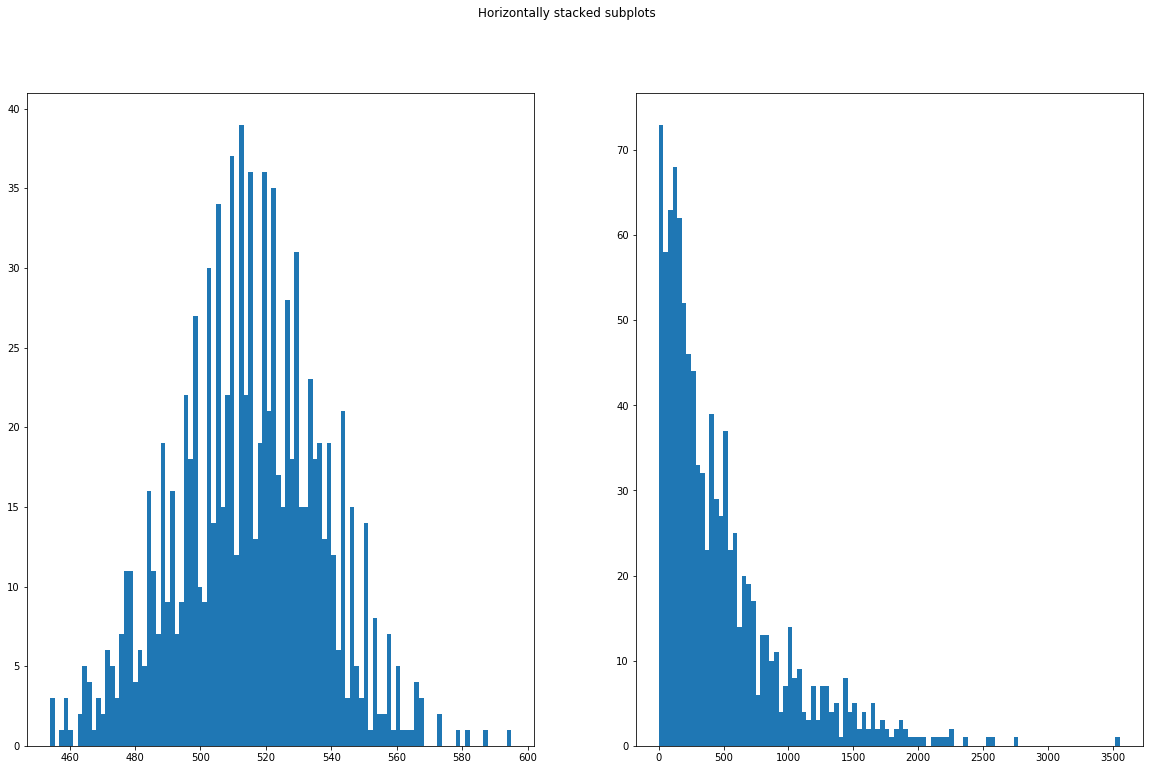

In [34]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
fig.suptitle('Horizontally stacked subplots')
ax1.hist(sim.log["IAT"],100);
ax2.hist(sim.log["ST"],100);


## Old notebook code

In [ ]:
*** M_M_1_inf_inf_FIFO ***
arrival rate: 8.0000 per hour
service rate: 9.0000 per hour
rho: 0.8889

P_0: probability that there are 0 customers in the system = 0.1111
P_1: probability of 1 customers in the system = 0.0988
P_10: probability of 10 customers in the system = 0.0342

no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
util_ser: server utilisation rate (P_(n>=2)) = 0.7901

L_s: the long term average number of customers present in the system = 8.0000
L_q: the long term average number of customers present in the queue = 7.1111
W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

In [36]:
c = 20

A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))
S = queueing.service_process("M", stats.expon(0))
q = queueing.queue(A, S, c)

print("Mean waiting time:", q.mean_waiting_time)
print("Delay probability:", q.delay_probability)

AttributeError: 'queue' object has no attribute 'mean_waiting_time'

In [ ]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.1

import numpy as np

customers = [1, 2, 5, 10, 20]
delay_probability = [0.90, 0.85, 0.76, 0.67, 0.55]
mean_waiting_time = [9.00, 4.26, 1.53, 0.67, 0.28]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)
    
    
    print(q.kendall_notation)
    print("Utilization:      ", .9, q.utilization)
    print("Delay probability:", delay_probability[i], q.delay_probability)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    


    # Check results
    assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
    assert np.isclose(delay_probability[i], q.delay_probability, rtol = 0.1, atol = 0.1)
    assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.1, atol = 0.1)

In [ ]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.2

import numpy as np

customers = [1, 2, 5, 10, 20]
utilization = [0.90, 0.95, 0.98, 0.99, 0.995]
mean_waiting_time = [9.00, 9.26, 9.50, 9.64, 9.74]
mean_queue_length = [9, 19, 51, 105, 214]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * utilization[i])))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)

    # Check results
    print(q.kendall_notation)
    print("Utilization:      ", utilization[i], q.utilization)
    print("Mean queue length:", mean_queue_length[i], q.mean_queue_length)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    
    
#     assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_queue_length[i], q.mean_queue_length, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.2, atol = 0.2)

In [ ]:
# c = customer
# IAT = inter arrival time
# AT = now + IAT
# ST = service time
# TSB = time service begins
# TCWQ = time customer waits in the queue
# TSE = time service ends
# TCSS = time customer spends in the system
# ITS = idle time of the server


# customer, IAT, AT, ST, TSB, TCWQ, TSE, TCSS, ITS

In [ ]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

In [ ]:
%%time
sim.simulate(50)

In [ ]:
sim.log

In [ ]:
print("Simulation results:")
sim.get_stats()

print("\n------------------------------------------\n")

print("Analytical solution:")
print("The arrival rate is:      {:04.2f} seconds".format(sim.environment.queue.A.arrival_rate))
print("The mean waiting time is: {:04.2f} seconds".format(sim.environment.queue.mean_waiting_time))
print("The mean service time is: {:04.2f} seconds".format(sim.environment.queue.S.mean_service_time))

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(data = sim.log)
df

In [ ]:
stats.poisson(1 / (c * 0.95)).rvs(10)

In [ ]:
import numpy as np
np.mean(stats.expon(0).rvs(10))

In [ ]:
print(np.mean(sim.log["In queue"]))
print(q.mean_queue_length)

In [ ]:
np.max(sim.log["In queue"])

### More complex queues

In [ ]:
c = 1
A = queueing.arrival_process("M", stats.poisson(1 / 0.9))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / 0.9))
print("Mean queue: ", sim_q)

In [ ]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.95)))
print("Mean queue: ", sim_q)

In [ ]:
c = 5
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.98)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.98)))
print("Mean queue: ", sim_q)